## Day 03 KNN Implementation
**03-Dec-2021**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dirpath = "../data/knn/classification/"
X = np.load(dirpath+"X_data.npy")
y = np.load(dirpath+"Y_data.npy")
print(X.shape, y.shape)

(500, 2) (500,)


No. of rows = no. of samples = 500, no. of columns= no. of features = 2

## Visualize data

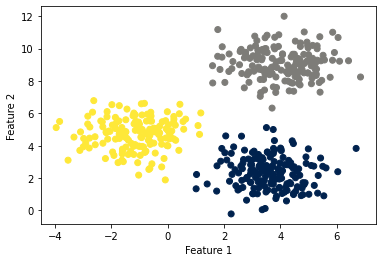

In [24]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.cividis)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [27]:
color_map = {0:'red', 1:'yellow', 2:'orange'} # key represents label/ category
colors = []
for label in y:
    colors.append(color_map[label])
print(colors[:10])
print(y[:10])

['orange', 'red', 'red', 'red', 'red', 'yellow', 'orange', 'red', 'yellow', 'orange']
[2 0 0 0 0 1 2 0 1 2]


In [48]:
colors = np.array([color_map[label] for label in y])

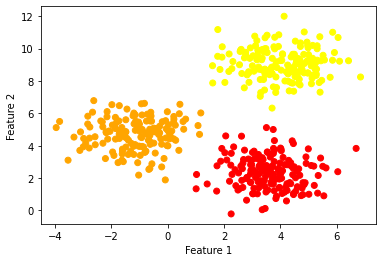

In [30]:
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [35]:
# categories in the data = no. of unique labels
cat = set(y)
print(cat)

{0, 1, 2}


In [38]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([167, 167, 166], dtype=int64))

In [39]:
uni_cat = np.unique(y)
print(uni_cat)

[0 1 2]


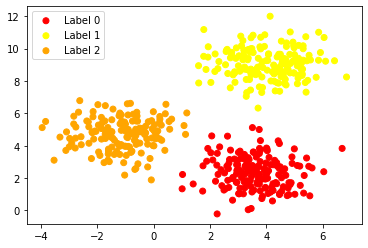

In [50]:
for cat in uni_cat:
    bool_idx = y==cat
    plt.scatter(X[bool_idx,0], X[bool_idx, 1], c=colors[bool_idx], label=f'Label {cat}')
plt.legend()
plt.show()

## KNN implementation
Given training data (X,y). And we want to predict the category/label of my test point (X,?)

## Algo:
1. Compute the distance of test point from each point in trainig set
2. Get the k-nearest neighbours
3. Get the category of k nearest neighbours
4. Prediction is the category with max sample count in knn

In [97]:
class KNN:
    
    def __init__(self, k=3):
        self.k = k
    
    def get_distance(self, pt1, pt2):
        return ((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2 )**0.5
        
    def predict(self, xtrain, ytrain, xtest):
        
        # compute distance
        distance = []
        for i in range(xtrain.shape[0]):
            d = self.get_distance(xtrain[i], xtest)
            distance.append([d,i])
            
        # get the k-nearest neighbours
        knn = sorted(distance, key=lambda el: el[0])[:self.k]
        
        # get the category of k nearest neighbours
        k_cat = {}
        for el in knn:
            cat = y[el[1]]
            if k_cat.get(cat) == None:
                k_cat[cat] = 1
            else:
                k_cat[cat] += 1
#         print(k_cat)
        
        # get the category with max sample count in knn
        max_ = 0
        pred = [0,0] # prediction: at 0th index we store category, 1st index we're storing corresponding freq
        for cat, freq in k_cat.items():
            if freq>max_:
                pred = [cat, freq]
                max_ = freq
        
        return pred[0], pred[1]/self.k # pred cat, confidence score

In [98]:
test_point = [2,6]
model = KNN()

In [100]:
model.predict(X, y, test_point)

(2, 0.6666666666666666)

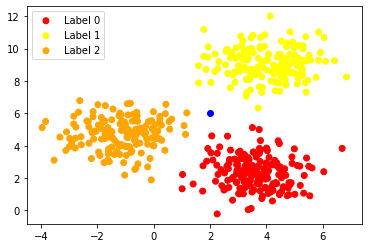

In [101]:
for cat in uni_cat:
    bool_idx = y==cat
    plt.scatter(X[bool_idx,0], X[bool_idx, 1], c=colors[bool_idx], label=f'Label {cat}')
plt.legend()

plt.scatter(test_point[0], test_point[1], c='blue')
plt.show()

### Plotting the Decision Boundary

In [102]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)

f1, f2 = np.meshgrid(f1,f2)

f1, f2 = f1.flatten(), f2.flatten()

predictions = []
for test_point in zip(f1, f2):
    p = model.predict(X, y, test_point)[0]
    predictions.append(p)

In [105]:
predictions = np.array(predictions)
predictions

array([2, 2, 2, ..., 1, 1, 1])

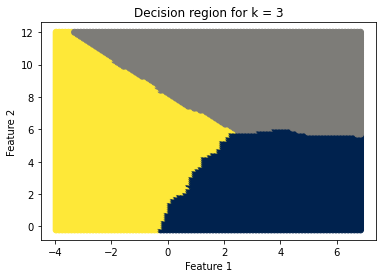

In [109]:
plt.scatter(f1, f2, c=predictions, cmap=plt.cm.cividis)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Decision region for k = {model.k}")
plt.show()

In [94]:
a = np.array([1,2,3,4])
b = np.array([1,2,3,4])

a, b = np.meshgrid(a,b)

a, b = a.flatten(), b.flatten()

print(a)

print(b)

[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]


In [95]:
for test_point in zip(a,b):
    print(test_point)

(1, 1)
(2, 1)
(3, 1)
(4, 1)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


In [93]:
print(a.flatten())
print(b.flatten())

[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
